In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dfx = pd.read_csv('Linear_X_Train.csv')
dfy = pd.read_csv('Linear_Y_Train.csv')
x = dfx.values
y = dfy.values

x = x.reshape((-1,))
y = y.reshape((-1,))
print(x.shape)
print(y.shape)
print(x.shape[0])

(3750,)
(3750,)
3750


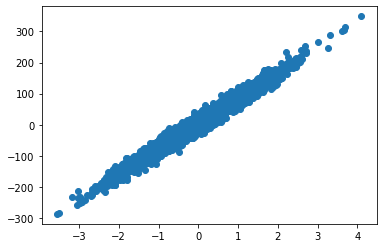

In [7]:
plt.scatter(x,y)


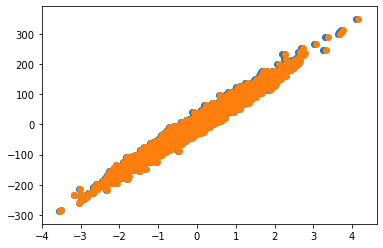

In [8]:
plt.scatter(x,y)
X = (x-x.mean())/x.std()
Y = y
plt.scatter(X,Y)
plt.show()

In [9]:
def hypothesis(x,theta):
    y_=theta[0] + theta[1]*x
    return y_


def error(X,Y,theta):
    
    m = X.shape[0]
    total_error = 0
    
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error+= (y_-Y[i])**2
        
    return total_error/m

def gradient(X,Y,theta):
    
    grad = np.zeros((2,))
    m = X.shape[0]

    for i in range(m):
        x=X[i]
        y_ = hypothesis(x,theta)
        grad[0] +=  (y_-Y[i])
        grad[1] += (y_-Y[i])*X[i]

    return grad/m
    
#Algorithm
def gradientDescent(X,Y,learning_rate=0.01,max_itr = 1000):
    
    theta = np.zeros((2,))
    
    
    
    error_list = []
    
    for i in range(max_itr):
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
    
    return theta,error_list
  

In [10]:
theta, error_list = gradientDescent(X,Y) 

In [11]:
theta

array([ 0.68383944, 79.90228731])

In [12]:
error_list

[6576.35005246196,
 6449.280702447456,
 6324.740032498279,
 6202.677721881052,
 6083.044451245134,
 5965.791882694873,
 5850.872640258765,
 5738.240290747138,
 5627.849324990778,
 5519.655139452959,
 5413.614018207396,
 5309.683115274547,
 5207.820437310101,
 5107.984826637156,
 5010.135944616575,
 4914.234255348224,
 4820.2410096963085,
 4728.118229632854,
 4637.828692892689,
 4549.335917933641,
 4462.604149196271,
 4377.598342656779,
 4294.284151667418,
 4212.627913078762,
 4132.596633638007,
 4054.1579766581267,
 3977.280248952148,
 3901.9323880275,
 3828.0839495352707,
 3755.70509496904,
 3684.766579608665,
 3615.239740703971,
 3547.096485893473,
 3480.309281853703,
 3414.851143174333,
 3350.6956214546617,
 3287.816794617238,
 3226.1892564338623,
 3165.788106260342,
 3106.588938975283,
 3048.567835119192,
 2991.701351229826,
 2935.9665103698617,
 2881.340792843025,
 2827.8021270949603,
 2775.328880795283,
 2723.899852096962,
 2673.4942610697585,
 2624.0917413039724,
 2575.672331681

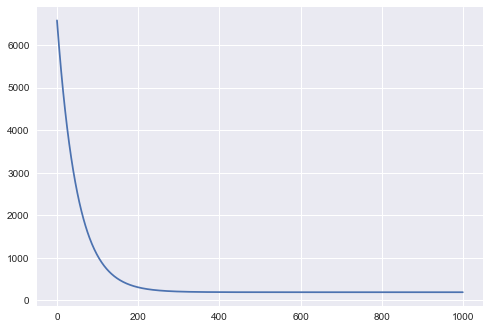

In [13]:
plt.style.use("seaborn")
plt.plot(error_list)
plt.show()

In [14]:
y_=hypothesis(X,theta)
print(y_)

[-19.57303678 -43.69499149  86.48343956 ... -20.85010075 138.69966931
 -35.87837666]


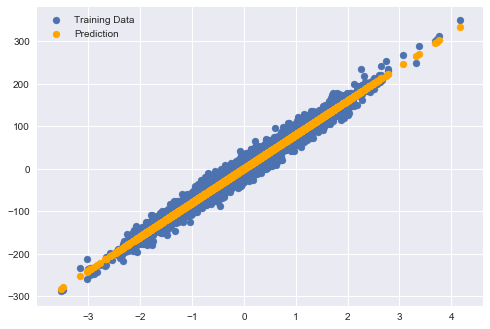

In [15]:
plt.scatter(X,Y,label='Training Data')
plt.scatter(X,y_,color='orange',label="Prediction")
plt.legend()
plt.show()

### Load the test data

In [16]:
X_test=pd.read_csv('Linear_X_Test.csv').values
Y_test=hypothesis(X_test,theta)
Y_test.shape

(1250, 1)

In [17]:
df= pd.DataFrame(data=Y_test,columns=["y"])

In [18]:
df.to_csv('y_prediction.csv',index=False)

### compute score

In [21]:
 def r2_score(Y,Y_):
        num =np.sum((Y-Y_)**2)
        denum =np.sum((Y-Y.mean())**2)
        score=(1-num/denum)
        return score*100

In [22]:
r2_score(y,y_)

97.09612215724674

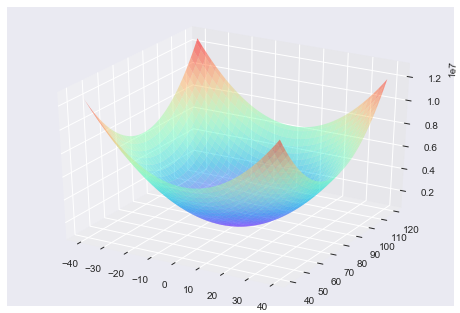

In [25]:
from mpl_toolkits.mplot3d import Axes3D
#ax = fig.add_subplot(111,project='3d')
T0 = np.arange(-40,40,1)
T1 = np.arange(40,120,1)
T0,T1 = np.meshgrid(T0,T1)
J = np.zeros(T0.shape)
m = T0.shape[0]
n = T0.shape[1]

for i in range(m):
    for j in range(n):
        J[i,j] = np.sum((Y - T1[i,j]*X - T0[i,j])**2)
        
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow',alpha=.5)
plt.show()

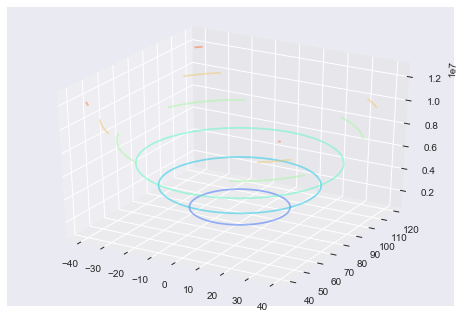

In [26]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow',alpha=.5)
plt.show()